# Steady State Comparison: Same Size (50:50)
We want to compare steady states of
- One-Sector Model (only formal sector)
- Two-Sector without Labor Mobility
- Two-Sector with Labor Mobility

## Experiment 1: Labor market implications
1. Higher unemployment risk in informal sector
2. Higher unemployment benefits in formal sector
3. Lower wage rate in informal sector

## Experiment 2: Financial constraints
1. No Borrowing Constraint in Formal sector, but in informal sector
2. Higher interest rate in Formal sector



In [1]:
from ConsIndShockModel_HANK import IndShockConsumerType 
from TwoSectorModel_HANK import TwoSectorMarkovConsumerType
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Define Baseline (2 Identical Sectors)

In [2]:
### Define shared parameters
Rfree_f = 0.03
Rfree_i = 0.03
PermShkStd_f = 0.06
PermShkStd_i = 0.06
TranShkStd_f = 0.2
TranShkStd_i = 0.2
PermGroFac_f = 1.0
PermGroFac_i = 1.0
UnempPrb_f = 0.05
UnempPrb_i = 0.05
IncUnemp_f = 0.0
IncUnemp_i = 0.0
taxrate_f = 0.0
taxrate_i = 0.0
labor_f = 1.0 #0.8
labor_i = 1.0 #0.8 #0.6
wage_f = 1.0
wage_i = 1.0
BoroCnstArt_f = 0.0
BoroCnstArt_i = 0.0
LivPrb_f = .99375
LivPrb_i = .99375

cycles = 0
T_cycle = 1

In [3]:
### Dictionary to be passed to the consumer type
HANK_Dict_Formal = {
    "cycles": cycles,
    "T_cycle": T_cycle,
    # Parameters shared with the perfect foresight model
    "Rfree": 1.0 + Rfree_f,                    # Interest factor on assets
    "LivPrb" : [LivPrb_f],                   # Survival probability

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [UnempPrb_f],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [TranShkStd_f],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,    
    "PermGroFac" : [PermGroFac_f],                  # Permanent income growth factor
    
    # HANK params
    "taxrate" : [taxrate_f], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [labor_f],
    "wage": [wage_f],    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : UnempPrb_f,                      # Probability of unemployment while working
    "IncUnemp" :  IncUnemp_f,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": BoroCnstArt_f,
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     
}

# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Dict_Formal['TranShkMean_Func'] = [function]

In [4]:
### Dictionary to be passed to the consumer type
HANK_Dict_Informal = {
    "cycles": cycles,
    "T_cycle": T_cycle,
    # Parameters shared with the perfect foresight model
    "Rfree": 1.0 + Rfree_i,                    # Interest factor on assets
    "LivPrb" : [LivPrb_i],                   # Survival probability

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [UnempPrb_i],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [TranShkStd_i],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,    
    "PermGroFac" : [PermGroFac_i],                  # Permanent income growth factor
    
    # HANK params
    "taxrate" : [taxrate_i], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [labor_i],
    "wage": [wage_i],    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : UnempPrb_i,                      # Probability of unemployment while working
    "IncUnemp" :  IncUnemp_i,                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": BoroCnstArt_i,
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     
}

# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Dict_Informal['TranShkMean_Func'] = [function]

In [5]:
# Define the Markov transition matrix for sector f(ormal) to i(nformal)
p_f_to_i = 0.2
p_i_to_f = 0.2
p_f_to_f = 1 - p_f_to_i
p_i_to_i = 1 - p_i_to_f

MrkvArray = np.array(
    [
        [
            p_f_to_f
        ,
            p_f_to_i
        ],
        [
           p_i_to_f
        ,
            p_i_to_i
        ]
    ]
)

NSectors = 2

Formal_Size = 0.5

In [6]:
### Dictionary to be passed to the consumer type
HANK_Dict_TwoSector = {
    "cycles": cycles,
    "T_cycle": T_cycle,
    # Parameters shared with the perfect foresight model
    "Rfree": [np.array([1.0 + Rfree_f, 1.0 + Rfree_i])],                    # Interest factor on assets
    "LivPrb" : [np.array([LivPrb_f, LivPrb_i])],                   # Survival probability

    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [np.array([UnempPrb_f, UnempPrb_i])],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [np.array([TranShkStd_f, TranShkStd_i])],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,    
    "PermGroFac": [np.array([PermGroFac_f, PermGroFac_i])],                  # Permanent income growth factor

    # HANK params
    "taxrate" : [np.array([taxrate_f, taxrate_i])], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [np.array([labor_f, labor_i])],
    "wage": [np.array([wage_f, wage_i])],    
    
    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : [np.array([UnempPrb_f, UnempPrb_i])],                      # Probability of unemployment while working
    "IncUnemp" :  [np.array([IncUnemp_f, IncUnemp_i])],                     # Unemployment benefits replacement rate
  
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMax" : 500,                      # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 100,                     # Number of points in the base grid of "assets above minimum"
    "BoroCnstArt": [BoroCnstArt_f, BoroCnstArt_i],
    
    # Transition Matrix simulation parameters
    "mCount": 200,
    "mMax": 500,
    "mMin": 1e-5,
    "mFac": 3,

    # Hank model bool
    "HANK":True,     

    ### Markov Parameters
    "MrkvArray": [MrkvArray],  # Transition Matrix for Markov Process
    "global_markov": False,  # If True, then the Markov Process is the same for all agents
    "MrkvPrbsInit": [Formal_Size, 1 - Formal_Size],
}

# to add taxes, labor, and wage. This ensures that we can shock each variable.
def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    return z

HANK_Dict_TwoSector['TranShkMean_Func'] = [function]

In [7]:
T = 300

## Define Agents and create Steady State Values

In [8]:
Agent_formal_Baseline = IndShockConsumerType(**HANK_Dict_Formal, verbose=False)
Agent_formal_Baseline.solve()
A_SS_Formal_Baseline, C_SS_Formal_Baseline = Agent_formal_Baseline.compute_steady_state()
MPC_Formal_Baseline = Agent_formal_Baseline.calc_jacobian('labor',T)[0][0][0]

In [9]:
Agent_informal_Baseline = IndShockConsumerType(**HANK_Dict_Informal, verbose=False)
Agent_informal_Baseline.solve()
A_SS_Informal_Baseline, C_SS_Informal_Baseline = Agent_informal_Baseline.compute_steady_state()
MPC_Informal_Baseline = Agent_informal_Baseline.calc_jacobian('labor',T)[0][0][0]

In [10]:
Agent_TwoSector_Baseline = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector)
Agent_TwoSector_Baseline.solve()
A_SS_TwoSector_Baseline, C_SS_TwoSector_Baseline, A_SS_Mrkv_TwoSector_Baseline, C_SS_Mrkv_TwoSector_Baseline = Agent_TwoSector_Baseline.compute_steady_state()
MPC_TwoSector_Baseline = Agent_TwoSector_Baseline.calc_jacobian('labor',0,T)[0][0][0]

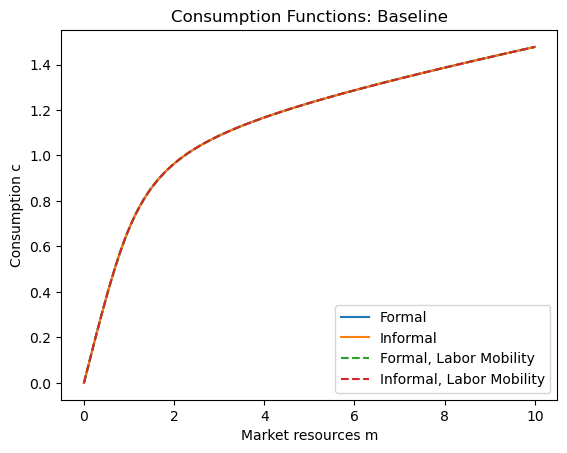

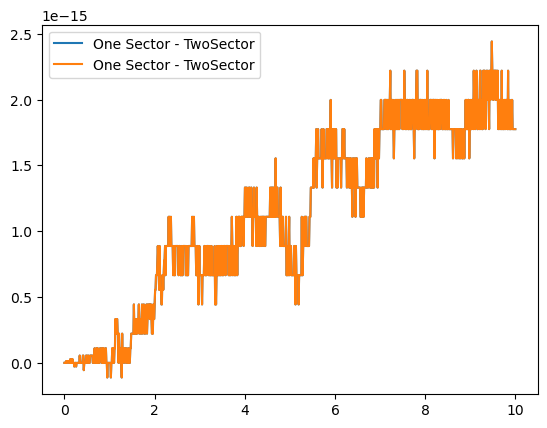

In [11]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_Baseline.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_Baseline.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_Baseline.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.legend()
plt.title('Consumption Functions: Baseline')
plt.savefig('../../figures/Consumption_Functions_Baseline.png')
plt.show()
# Difference
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid) - Agent_TwoSector_Baseline.solution[0].cFunc[0](mGrid), label='One Sector - TwoSector')
plt.plot(mGrid, Agent_informal_Baseline.solution[0].cFunc(mGrid) - Agent_TwoSector_Baseline.solution[0].cFunc[1](mGrid), label='One Sector - TwoSector')
plt.legend()
plt.show()


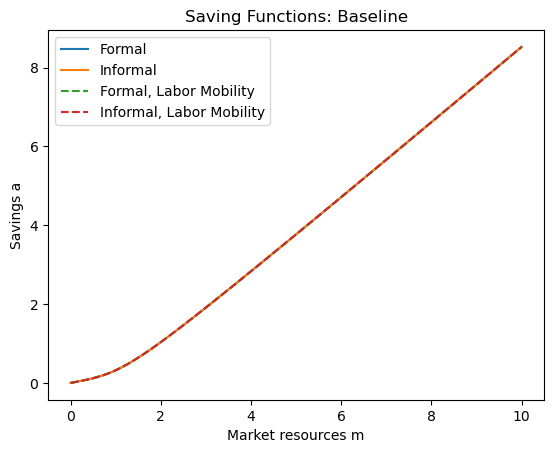

In [12]:
plt.plot(mGrid, mGrid - Agent_formal_Baseline.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, mGrid - Agent_informal_Baseline.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, mGrid - Agent_TwoSector_Baseline.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, mGrid - Agent_TwoSector_Baseline.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.xlabel('Market resources m')
plt.ylabel('Savings a')
plt.legend()
plt.title('Saving Functions: Baseline')
plt.savefig('../../figures/Saving_Functions_Baseline.png')
plt.show()

In [13]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_Baseline = C_SS_Formal_Baseline * Formal_Size + C_SS_Informal_Baseline * (1 - Formal_Size)
A_ss_NoMobility_Baseline = A_SS_Formal_Baseline * Formal_Size + A_SS_Informal_Baseline * (1 - Formal_Size)

MPC_NoMobility_Baseline = MPC_Formal_Baseline * Formal_Size + MPC_Informal_Baseline * (1 - Formal_Size)

In [14]:
## Compare Steady States
print('Steady States:')
print('No Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_Baseline, A_SS_Formal_Baseline))
print('No Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_Baseline, A_SS_Informal_Baseline))
print('No Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_Baseline, A_ss_NoMobility_Baseline))
print('With Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_Baseline[0], A_SS_Mrkv_TwoSector_Baseline[0]))
print('With Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_Baseline[1], A_SS_Mrkv_TwoSector_Baseline[1]))
print('With Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_Baseline, A_SS_TwoSector_Baseline))

## Compare MPCs
print('MPCs:')
print('No Mobility: Formal Sector: {:.3f}'.format(MPC_Formal_Baseline))
print('No Mobility: Informal Sector: {:.3f}'.format(MPC_Informal_Baseline))
print('No Mobility: Total: {:.3f}'.format(MPC_NoMobility_Baseline))
print('With Mobility: Total: {:.3f}'.format(MPC_TwoSector_Baseline))

Steady States:
No Mobility: Formal Sector: Consumption 1.040 Assets 1.683
No Mobility: Informal Sector: Consumption 1.040 Assets 1.683
No Mobility: Total: Consumption 1.040 Assets 1.683
With Mobility: Formal Sector: Consumption 1.040 Assets 1.683
With Mobility: Informal Sector: Consumption 1.040 Assets 1.683
With Mobility: Total: Consumption 1.040 Assets 1.683
MPCs:
No Mobility: Formal Sector: 0.118
No Mobility: Informal Sector: 0.118
No Mobility: Total: 0.118
With Mobility: Total: 0.118


## Experiment 1: Labor market implications

#### 1A) Higher unemployment risk in informal sector

In [15]:
UnempPrb_f = 0.05
UnempPrb_i = 0.1
IncUnemp_f = 0.0
IncUnemp_i = 0.0

In [16]:
HANK_Dict_Formal_URisk = deepcopy(HANK_Dict_Formal)
HANK_Dict_Formal_URisk['UnempPrb'] = UnempPrb_f
HANK_Dict_Formal_URisk['IncUnemp'] = IncUnemp_f

HANK_Dict_Informal_URisk = deepcopy(HANK_Dict_Informal)
HANK_Dict_Informal_URisk['UnempPrb'] = UnempPrb_i
HANK_Dict_Informal_URisk['IncUnemp'] = IncUnemp_i

HANK_Dict_TwoSector_URisk = deepcopy(HANK_Dict_TwoSector)
HANK_Dict_TwoSector_URisk['UnempPrb'] = [np.array([UnempPrb_f, UnempPrb_i])]
HANK_Dict_TwoSector_URisk['IncUnemp'] = [np.array([IncUnemp_f, IncUnemp_i])]

In [17]:
Agent_formal_URisk = IndShockConsumerType(**HANK_Dict_Formal_URisk, verbose=False)
Agent_formal_URisk.solve()
A_SS_Formal_URisk, C_SS_Formal_URisk = Agent_formal_URisk.compute_steady_state()
MPC_Formal_URisk = Agent_formal_URisk.calc_jacobian('labor',T)[0][0][0]

Agent_informal_URisk = IndShockConsumerType(**HANK_Dict_Informal_URisk, verbose=False)
Agent_informal_URisk.solve()
A_SS_Informal_URisk, C_SS_Informal_URisk = Agent_informal_URisk.compute_steady_state()
MPC_Informal_URisk = Agent_informal_URisk.calc_jacobian('labor',T)[0][0][0]

Agent_TwoSector_URisk = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector_URisk)
Agent_TwoSector_URisk.solve()
A_SS_TwoSector_URisk, C_SS_TwoSector_URisk, A_SS_Mrkv_TwoSector_URisk, C_SS_Mrkv_TwoSector_URisk = Agent_TwoSector_URisk.compute_steady_state()
MPC_TwoSector_URisk = Agent_TwoSector_URisk.calc_jacobian('labor',0,T)[0][0][0]

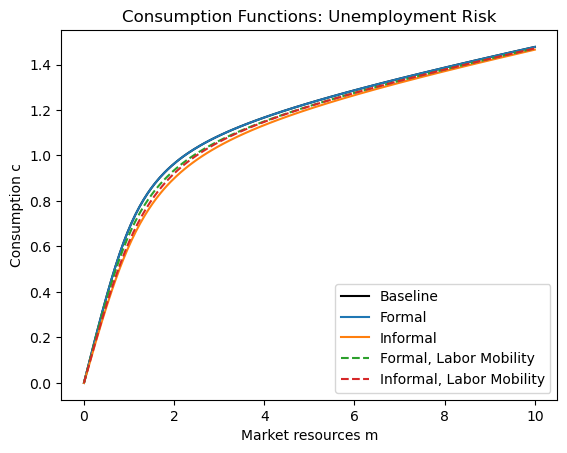

In [18]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), 'black', label='Baseline')
plt.plot(mGrid, Agent_formal_URisk.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_URisk.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_URisk.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_URisk.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.legend()
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.title('Consumption Functions: Unemployment Risk')
plt.savefig('../../figures/Consumption_Functions_URisk.png')
plt.show()

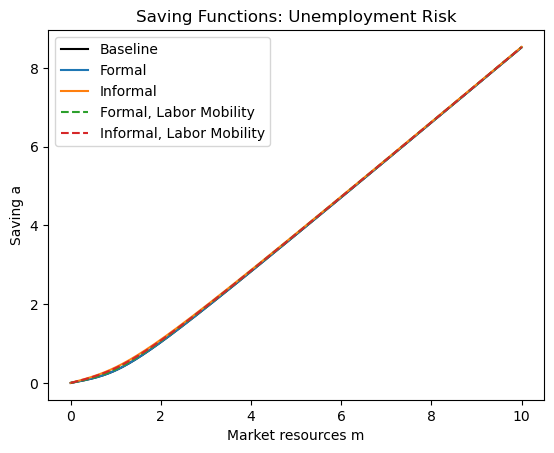

In [19]:
plt.plot(mGrid, mGrid - Agent_formal_Baseline.solution[0].cFunc(mGrid), 'black', label='Baseline')
plt.plot(mGrid, mGrid - Agent_formal_URisk.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, mGrid - Agent_informal_URisk.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, mGrid - Agent_TwoSector_URisk.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, mGrid - Agent_TwoSector_URisk.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.legend()
plt.xlabel('Market resources m')
plt.ylabel('Saving a')
plt.title('Saving Functions: Unemployment Risk')
plt.savefig('../../figures/Saving_Functions_URisk.png')
plt.show()

In [20]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_URisk = C_SS_Formal_URisk * Formal_Size + C_SS_Informal_URisk * (1 - Formal_Size)
A_ss_NoMobility_URisk = A_SS_Formal_URisk * Formal_Size + A_SS_Informal_URisk * (1 - Formal_Size)
MPC_NoMobility_URisk = MPC_Formal_URisk * Formal_Size + MPC_Informal_URisk * (1 - Formal_Size)
## Compare Steady States
print('Steady States:')
print('No Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_URisk, A_SS_Formal_URisk))
print('No Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_URisk, A_SS_Informal_URisk))
print('No Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_URisk, A_ss_NoMobility_URisk))
print('With Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_URisk[0], A_SS_Mrkv_TwoSector_URisk[0]))
print('With Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_URisk[1], A_SS_Mrkv_TwoSector_URisk[1]))
print('With Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_URisk, A_SS_TwoSector_URisk))

## Compare MPCs
print('MPCs:')
print('No Mobility: Formal Sector: {:.3f}'.format(MPC_Formal_URisk))
print('No Mobility: Informal Sector: {:.3f}'.format(MPC_Informal_URisk))
print('No Mobility: Total: {:.3f}'.format(MPC_NoMobility_URisk))
print('With Mobility: Total: {:.3f}'.format(MPC_TwoSector_URisk))

Steady States:
No Mobility: Formal Sector: Consumption 1.040 Assets 1.683
No Mobility: Informal Sector: Consumption 1.055 Assets 2.317
No Mobility: Total: Consumption 1.047 Assets 2.000
With Mobility: Formal Sector: Consumption 1.052 Assets 2.018
With Mobility: Informal Sector: Consumption 1.044 Assets 2.047
With Mobility: Total: Consumption 1.048 Assets 2.032
MPCs:
No Mobility: Formal Sector: 0.118
No Mobility: Informal Sector: 0.105
No Mobility: Total: 0.111
With Mobility: Total: 0.110


#### 1B) Higher unemployment Insurance in formal sector

In [21]:
UnempPrb_f = 0.05
UnempPrb_i = 0.05
IncUnemp_f = 0.7
IncUnemp_i = 0.0

In [22]:
HANK_Dict_Formal_IncUnemp = deepcopy(HANK_Dict_Formal)
HANK_Dict_Formal_IncUnemp['UnempPrb'] = UnempPrb_f
HANK_Dict_Formal_IncUnemp['IncUnemp'] = IncUnemp_f

HANK_Dict_Informal_IncUnemp = deepcopy(HANK_Dict_Informal)
HANK_Dict_Informal_IncUnemp['UnempPrb'] = UnempPrb_i
HANK_Dict_Informal_IncUnemp['IncUnemp'] = IncUnemp_i

HANK_Dict_TwoSector_IncUnemp = deepcopy(HANK_Dict_TwoSector)
HANK_Dict_TwoSector_IncUnemp['UnempPrb'] = [np.array([UnempPrb_f, UnempPrb_i])]
HANK_Dict_TwoSector_IncUnemp['IncUnemp'] = [np.array([IncUnemp_f, IncUnemp_i])]

In [23]:
Agent_formal_IncUnemp = IndShockConsumerType(**HANK_Dict_Formal_IncUnemp, verbose=False)
Agent_formal_IncUnemp.solve()
A_SS_Formal_IncUnemp, C_SS_Formal_IncUnemp = Agent_formal_IncUnemp.compute_steady_state()
MPC_Formal_IncUnemp = Agent_formal_IncUnemp.calc_jacobian('labor',T)[0][0][0]

Agent_informal_IncUnemp = IndShockConsumerType(**HANK_Dict_Informal_IncUnemp, verbose=False)
Agent_informal_IncUnemp.solve()
A_SS_Informal_IncUnemp, C_SS_Informal_IncUnemp = Agent_informal_IncUnemp.compute_steady_state()
MPC_Informal_IncUnemp = Agent_informal_IncUnemp.calc_jacobian('labor',T)[0][0][0]

Agent_TwoSector_IncUnemp = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector_IncUnemp)
Agent_TwoSector_IncUnemp.solve()
A_SS_TwoSector_IncUnemp, C_SS_TwoSector_IncUnemp, A_SS_Mrkv_TwoSector_IncUnemp, C_SS_Mrkv_TwoSector_IncUnemp = Agent_TwoSector_IncUnemp.compute_steady_state()
MPC_TwoSector_IncUnemp = Agent_TwoSector_IncUnemp.calc_jacobian('labor',0,T)[0][0][0]

c:\Users\adria\anaconda3\envs\Durable\lib\site-packages\HARK\interpolation.py:2187: RuntimeWarning: All-NaN slice encountered
  y = self.compare(fx, axis=1)


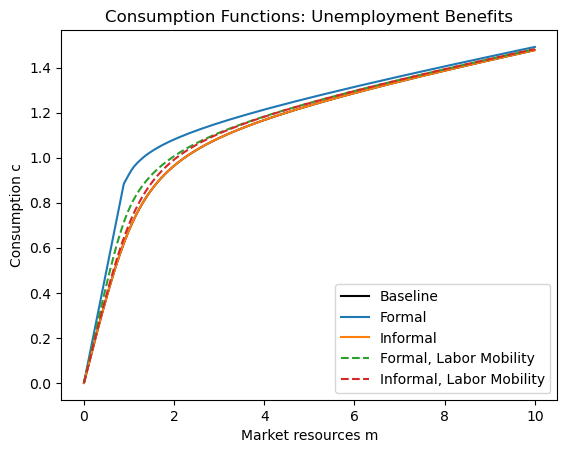

In [24]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), 'black', label='Baseline')
plt.plot(mGrid, Agent_formal_IncUnemp.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_IncUnemp.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_IncUnemp.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_IncUnemp.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.legend()
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.title('Consumption Functions: Unemployment Benefits')
plt.savefig('../../figures/Consumption_Functions_IncUnemp.png')
plt.show()

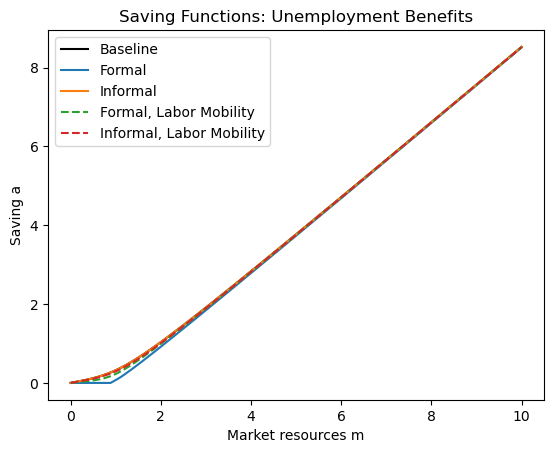

In [25]:
plt.plot(mGrid, mGrid - Agent_formal_Baseline.solution[0].cFunc(mGrid), 'black', label='Baseline')
plt.plot(mGrid, mGrid - Agent_formal_IncUnemp.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, mGrid - Agent_informal_IncUnemp.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, mGrid - Agent_TwoSector_IncUnemp.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, mGrid - Agent_TwoSector_IncUnemp.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.legend()
plt.xlabel('Market resources m')
plt.ylabel('Saving a')
plt.title('Saving Functions: Unemployment Benefits')
plt.savefig('../../figures/Saving_Functions_IncUnemp.png')
plt.show()

In [26]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_IncUnemp = C_SS_Formal_IncUnemp * Formal_Size + C_SS_Informal_IncUnemp * (1 - Formal_Size)
A_ss_NoMobility_IncUnemp = A_SS_Formal_IncUnemp * Formal_Size + A_SS_Informal_IncUnemp * (1 - Formal_Size)
MPC_NoMobility_IncUnemp = MPC_Formal_IncUnemp * Formal_Size + MPC_Informal_IncUnemp * (1 - Formal_Size)
## Compare Steady States
print('Steady States:')
print('No Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_IncUnemp, A_SS_Formal_IncUnemp))
print('No Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_IncUnemp, A_SS_Informal_IncUnemp))
print('No Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_IncUnemp, A_ss_NoMobility_IncUnemp))
print('With Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_IncUnemp[0], A_SS_Mrkv_TwoSector_IncUnemp[0]))
print('With Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_IncUnemp[1], A_SS_Mrkv_TwoSector_IncUnemp[1]))
print('With Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_IncUnemp, A_SS_TwoSector_IncUnemp))

## Compare MPCs
print('MPCs:')
print('No Mobility: Formal Sector: {:.3f}'.format(MPC_Formal_IncUnemp))
print('No Mobility: Informal Sector: {:.3f}'.format(MPC_Informal_IncUnemp))
print('No Mobility: Total: {:.3f}'.format(MPC_NoMobility_IncUnemp))
print('With Mobility: Total: {:.3f}'.format(MPC_TwoSector_IncUnemp))

Steady States:
No Mobility: Formal Sector: Consumption 1.012 Assets 0.493
No Mobility: Informal Sector: Consumption 1.040 Assets 1.683
No Mobility: Total: Consumption 1.026 Assets 1.088
With Mobility: Formal Sector: Consumption 1.039 Assets 1.324
With Mobility: Informal Sector: Consumption 1.025 Assets 1.374
With Mobility: Total: Consumption 1.032 Assets 1.349
MPCs:
No Mobility: Formal Sector: 0.178
No Mobility: Informal Sector: 0.118
No Mobility: Total: 0.148
With Mobility: Total: 0.125


#### 1C) Wage gap between formal and informal sector (mean preserving)

In [27]:
wage_f = 1.1
wage_i = 1/wage_f

In [28]:
HANK_Dict_Formal_wage = deepcopy(HANK_Dict_Formal)
HANK_Dict_Formal_wage['wage'] = [wage_f]

HANK_Dict_Informal_wage = deepcopy(HANK_Dict_Informal)
HANK_Dict_Informal_wage['wage'] = [wage_i]

HANK_Dict_TwoSector_wage = deepcopy(HANK_Dict_TwoSector)
HANK_Dict_TwoSector_wage['wage'] = [np.array([wage_f, wage_i])]



In [29]:
Agent_formal_wage = IndShockConsumerType(**HANK_Dict_Formal_wage, verbose=False)
Agent_formal_wage.solve()
A_SS_Formal_wage, C_SS_Formal_wage = Agent_formal_wage.compute_steady_state()
MPC_Formal_wage = Agent_formal_wage.calc_jacobian('labor',T)[0][0][0]

Agent_informal_wage = IndShockConsumerType(**HANK_Dict_Informal_wage, verbose=False)
Agent_informal_wage.solve()
A_SS_Informal_wage, C_SS_Informal_wage = Agent_informal_wage.compute_steady_state()
MPC_Informal_wage = Agent_informal_wage.calc_jacobian('labor',T)[0][0][0]

Agent_TwoSector_wage = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector_wage)
Agent_TwoSector_wage.solve()
A_SS_TwoSector_wage, C_SS_TwoSector_wage, A_SS_Mrkv_TwoSector_wage, C_SS_Mrkv_TwoSector_wage = Agent_TwoSector_wage.compute_steady_state()
MPC_TwoSector_wage = Agent_TwoSector_wage.calc_jacobian('labor',0,T)[0][0][0]

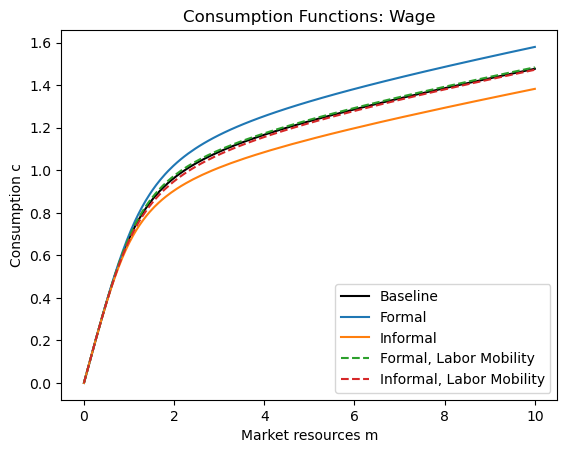

In [30]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), 'black', label='Baseline')
plt.plot(mGrid, Agent_formal_wage.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_wage.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_wage.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_wage.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.title('Consumption Functions: Wage')
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.legend()
plt.savefig('../../figures/Consumption_Functions_Wage.png')
plt.show()

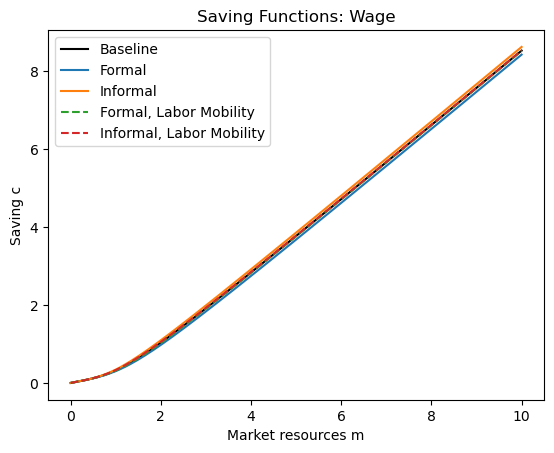

In [31]:
plt.plot(mGrid, mGrid - Agent_formal_Baseline.solution[0].cFunc(mGrid), 'black', label='Baseline')
plt.plot(mGrid, mGrid - Agent_formal_wage.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, mGrid - Agent_informal_wage.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, mGrid - Agent_TwoSector_wage.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, mGrid - Agent_TwoSector_wage.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.title('Saving Functions: Wage')
plt.xlabel('Market resources m')
plt.ylabel('Saving c')
plt.legend()
plt.savefig('../../figures/Saving_Functions_Wage.png')
plt.show()

In [32]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_wage = C_SS_Formal_wage * Formal_Size + C_SS_Informal_wage * (1 - Formal_Size)
A_ss_NoMobility_wage = A_SS_Formal_wage * Formal_Size + A_SS_Informal_wage * (1 - Formal_Size)
MPC_NoMobility_wage = MPC_Formal_wage * Formal_Size + MPC_Informal_wage * (1 - Formal_Size)

## Compare Steady States
print('Steady States:')
print('No Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_wage, A_SS_Formal_wage))
print('No Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_wage, A_SS_Informal_wage))
print('No Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_wage, A_ss_NoMobility_wage))
print('With Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_wage[0], A_SS_Mrkv_TwoSector_wage[0]))
print('With Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_wage[1], A_SS_Mrkv_TwoSector_wage[1]))
print('With Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_wage, A_SS_TwoSector_wage))

## Compare MPCs
print('MPCs:')
print('No Mobility: Formal Sector: {:.3f}'.format(MPC_Formal_wage))
print('No Mobility: Informal Sector: {:.3f}'.format(MPC_Informal_wage))
print('No Mobility: Total: {:.3f}'.format(MPC_NoMobility_wage))
print('With Mobility: Total: {:.3f}'.format(MPC_TwoSector_wage))

Steady States:
No Mobility: Formal Sector: Consumption 1.143 Assets 1.850
No Mobility: Informal Sector: Consumption 0.946 Assets 1.532
No Mobility: Total: Consumption 1.044 Assets 1.691
With Mobility: Formal Sector: Consumption 1.078 Assets 1.958
With Mobility: Informal Sector: Consumption 1.016 Assets 1.652
With Mobility: Total: Consumption 1.047 Assets 1.805
MPCs:
No Mobility: Formal Sector: 0.130
No Mobility: Informal Sector: 0.107
No Mobility: Total: 0.118
With Mobility: Total: 0.115


## Experiment 2: Financial Constraints

#### 1A) No Borrowing Constraint in Formal Sector

In [33]:
BoroCnstArt_f = -0.5
BoroCnstArt_i = 0.0


In [34]:
# UnempPrb_f = 0.05
# UnempPrb_i = 0.05
# IncUnemp_f = 0.7
# IncUnemp_i = 0.0

In [35]:
HANK_Dict_Formal_BoroCnst = deepcopy(HANK_Dict_Formal)
HANK_Dict_Formal_BoroCnst['BoroCnstArt'] = BoroCnstArt_f
# HANK_Dict_Formal_BoroCnst['IncUnemp'] = IncUnemp_f
# HANK_Dict_Formal_BoroCnst['UnempPrb'] = UnempPrb_f

HANK_Dict_Informal_BoroCnst = deepcopy(HANK_Dict_Informal)
HANK_Dict_Informal_BoroCnst['BoroCnstArt'] = BoroCnstArt_i
# HANK_Dict_Informal_BoroCnst['IncUnemp'] = IncUnemp_i
# HANK_Dict_Informal_BoroCnst['UnempPrb'] = UnempPrb_i

HANK_Dict_TwoSector_BoroCnst = deepcopy(HANK_Dict_TwoSector)
HANK_Dict_TwoSector_BoroCnst['BoroCnstArt'] = [BoroCnstArt_f, BoroCnstArt_i]
# HANK_Dict_TwoSector_BoroCnst['IncUnemp'] = [np.array([IncUnemp_f, IncUnemp_i])]
# HANK_Dict_TwoSector_BoroCnst['UnempPrb'] = [np.array([UnempPrb_f, IncUnemp_i])]


In [36]:
Agent_formal_BoroCnst = IndShockConsumerType(**HANK_Dict_Formal_BoroCnst, verbose=False)
Agent_formal_BoroCnst.solve()
A_SS_Formal_BoroCnst, C_SS_Formal_BoroCnst = Agent_formal_BoroCnst.compute_steady_state()
MPC_Formal_BoroCnst = Agent_formal_BoroCnst.calc_jacobian('labor',T)[0][0][0]

Agent_informal_BoroCnst = IndShockConsumerType(**HANK_Dict_Informal_BoroCnst, verbose=False)
Agent_informal_BoroCnst.solve()
A_SS_Informal_BoroCnst, C_SS_Informal_BoroCnst = Agent_informal_BoroCnst.compute_steady_state()
MPC_Informal_BoroCnst = Agent_informal_BoroCnst.calc_jacobian('labor',T)[0][0][0]

Agent_TwoSector_BoroCnst = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector_BoroCnst)
Agent_TwoSector_BoroCnst.solve()
A_SS_TwoSector_BoroCnst, C_SS_TwoSector_BoroCnst, A_SS_Mrkv_TwoSector_BoroCnst, C_SS_Mrkv_TwoSector_BoroCnst = Agent_TwoSector_BoroCnst.compute_steady_state()
MPC_TwoSector_BoroCnst = Agent_TwoSector_BoroCnst.calc_jacobian('labor',0,T)[0][0][0]

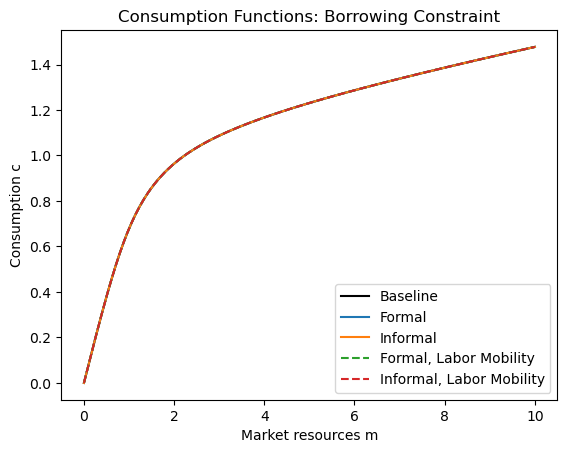

In [37]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), 'black', label='Baseline')
plt.plot(mGrid, Agent_formal_BoroCnst.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_BoroCnst.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_BoroCnst.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_BoroCnst.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.title('Consumption Functions: Borrowing Constraint')
plt.legend()
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.savefig('../../figures/Consumption_Functions_BoroCnst.png')
plt.show()


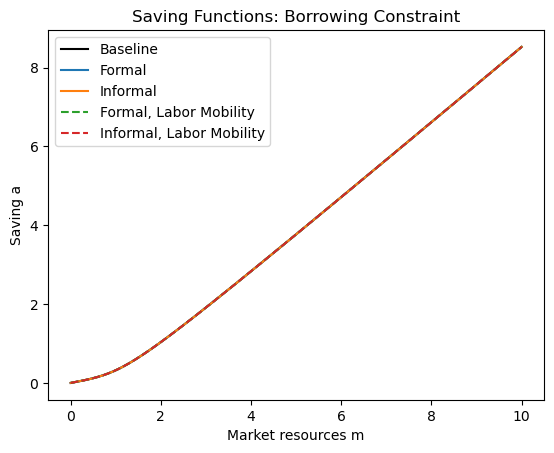

In [38]:
plt.plot(mGrid, mGrid - Agent_formal_Baseline.solution[0].cFunc(mGrid), 'black', label='Baseline')
plt.plot(mGrid, mGrid - Agent_formal_BoroCnst.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, mGrid - Agent_informal_BoroCnst.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, mGrid - Agent_TwoSector_BoroCnst.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, mGrid - Agent_TwoSector_BoroCnst.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.title('Saving Functions: Borrowing Constraint')
plt.legend()
plt.xlabel('Market resources m')
plt.ylabel('Saving a')
plt.savefig('../../figures/Saving_Functions_BoroCnst.png')
plt.show()

In [39]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_BoroCnst = C_SS_Formal_BoroCnst * Formal_Size + C_SS_Informal_BoroCnst * (1 - Formal_Size)
A_ss_NoMobility_BoroCnst = A_SS_Formal_BoroCnst * Formal_Size + A_SS_Informal_BoroCnst * (1 - Formal_Size)
MPC_NoMobility_BoroCnst = MPC_Formal_BoroCnst * Formal_Size + MPC_Informal_BoroCnst * (1 - Formal_Size)

## Compare Steady States
print('Steady States:')
print('No Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_BoroCnst, A_SS_Formal_BoroCnst))
print('No Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_BoroCnst, A_SS_Informal_BoroCnst))
print('No Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_BoroCnst, A_ss_NoMobility_BoroCnst))
print('With Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_BoroCnst[0], A_SS_Mrkv_TwoSector_BoroCnst[0]))
print('With Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_BoroCnst[1], A_SS_Mrkv_TwoSector_BoroCnst[1]))
print('With Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_BoroCnst, A_SS_TwoSector_BoroCnst))

## Compare MPCs
print('MPCs:')
print('No Mobility: Formal Sector: {:.3f}'.format(MPC_Formal_BoroCnst))
print('No Mobility: Informal Sector: {:.3f}'.format(MPC_Informal_BoroCnst))
print('No Mobility: Total: {:.3f}'.format(MPC_NoMobility_BoroCnst))
print('With Mobility: Total: {:.3f}'.format(MPC_TwoSector_BoroCnst))

Steady States:
No Mobility: Formal Sector: Consumption 1.040 Assets 1.683
No Mobility: Informal Sector: Consumption 1.040 Assets 1.683
No Mobility: Total: Consumption 1.040 Assets 1.683
With Mobility: Formal Sector: Consumption 1.040 Assets 1.683
With Mobility: Informal Sector: Consumption 1.040 Assets 1.683
With Mobility: Total: Consumption 1.040 Assets 1.683
MPCs:
No Mobility: Formal Sector: 0.118
No Mobility: Informal Sector: 0.118
No Mobility: Total: 0.118
With Mobility: Total: 0.118


#### 1B) Higher Interest Rate in Formal Sector

In [40]:
Rfree_f = 0.03
Rfree_i = 0.00

In [41]:
HANK_Dict_Formal_Rfree = deepcopy(HANK_Dict_Formal)
HANK_Dict_Formal_Rfree['Rfree'] = 1 + Rfree_f

HANK_Dict_Informal_Rfree = deepcopy(HANK_Dict_Informal)
HANK_Dict_Informal_Rfree['Rfree'] = 1 + Rfree_i

HANK_Dict_TwoSector_Rfree = deepcopy(HANK_Dict_TwoSector)
HANK_Dict_TwoSector_Rfree['wage'] = [np.array([1 + Rfree_f, 1 + Rfree_i])]



In [42]:
Agent_formal_Rfree = IndShockConsumerType(**HANK_Dict_Formal_Rfree, verbose=False)
Agent_formal_Rfree.solve()
A_SS_Formal_Rfree, C_SS_Formal_Rfree = Agent_formal_Rfree.compute_steady_state()
MPC_Formal_Rfree = Agent_formal_Rfree.calc_jacobian('labor',T)[0][0][0]

Agent_informal_Rfree = IndShockConsumerType(**HANK_Dict_Informal_Rfree, verbose=False)
Agent_informal_Rfree.solve()
A_SS_Informal_Rfree, C_SS_Informal_Rfree = Agent_informal_Rfree.compute_steady_state()
MPC_Informal_Rfree = Agent_informal_Rfree.calc_jacobian('labor',T)[0][0][0]

Agent_TwoSector_Rfree = TwoSectorMarkovConsumerType(**HANK_Dict_TwoSector_Rfree)
Agent_TwoSector_Rfree.solve()
A_SS_TwoSector_Rfree, C_SS_TwoSector_Rfree, A_SS_Mrkv_TwoSector_Rfree, C_SS_Mrkv_TwoSector_Rfree = Agent_TwoSector_Rfree.compute_steady_state()
MPC_TwoSector_Rfree = Agent_TwoSector_Rfree.calc_jacobian('labor',0,T)[0][0][0]


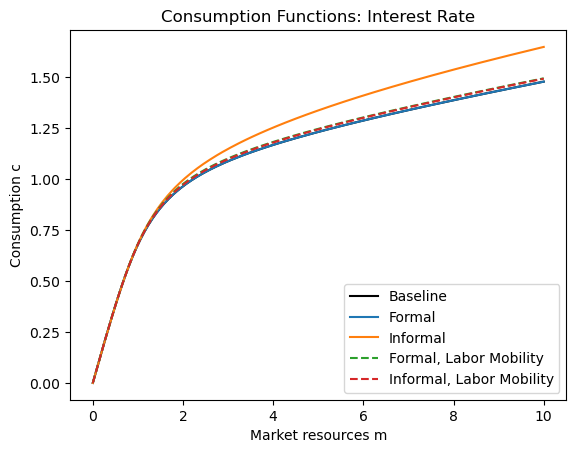

In [43]:
### Compare consumption functions
mGrid = np.linspace(0, 10, 1000)
plt.plot(mGrid, Agent_formal_Baseline.solution[0].cFunc(mGrid), 'black', label='Baseline')
plt.plot(mGrid, Agent_formal_Rfree.solution[0].cFunc(mGrid), label='Formal')
plt.plot(mGrid, Agent_informal_Rfree.solution[0].cFunc(mGrid), label='Informal')
plt.plot(mGrid, Agent_TwoSector_Rfree.solution[0].cFunc[0](mGrid), '--', label='Formal, Labor Mobility')
plt.plot(mGrid, Agent_TwoSector_Rfree.solution[0].cFunc[1](mGrid), '--', label='Informal, Labor Mobility')
plt.legend()
plt.xlabel('Market resources m')
plt.ylabel('Consumption c')
plt.title('Consumption Functions: Interest Rate')
plt.savefig('../../figures/Consumption_Functions_Rfree.png')
plt.show()



In [44]:
## Construct Steady State for No Mobility:
C_ss_NoMobility_Rfree = C_SS_Formal_Rfree * Formal_Size + C_SS_Informal_Rfree * (1 - Formal_Size)
A_ss_NoMobility_Rfree = A_SS_Formal_Rfree * Formal_Size + A_SS_Informal_Rfree * (1 - Formal_Size)
MPC_NoMobility_Rfree = MPC_Formal_Rfree * Formal_Size + MPC_Informal_Rfree * (1 - Formal_Size)

## Compare Steady States
print('Steady States:')
print('No Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Formal_Rfree, A_SS_Formal_Rfree))
print('No Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Informal_Rfree, A_SS_Informal_Rfree))
print('No Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_ss_NoMobility_Rfree, A_ss_NoMobility_Rfree))
print('With Mobility: Formal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_Rfree[0], A_SS_Mrkv_TwoSector_Rfree[0]))
print('With Mobility: Informal Sector: Consumption {:.3f} Assets {:.3f}'.format(C_SS_Mrkv_TwoSector_Rfree[1], A_SS_Mrkv_TwoSector_Rfree[1]))
print('With Mobility: Total: Consumption {:.3f} Assets {:.3f}'.format(C_SS_TwoSector_Rfree, A_SS_TwoSector_Rfree))

## Compare MPCs
print('MPCs:')
print('No Mobility: Formal Sector: {:.3f}'.format(MPC_Formal_Rfree))
print('No Mobility: Informal Sector: {:.3f}'.format(MPC_Informal_Rfree))
print('No Mobility: Total: {:.3f}'.format(MPC_NoMobility_Rfree))
print('With Mobility: Total: {:.3f}'.format(MPC_TwoSector_Rfree))

Steady States:
No Mobility: Formal Sector: Consumption 1.040 Assets 1.683
No Mobility: Informal Sector: Consumption 0.993 Assets 1.093
No Mobility: Total: Consumption 1.016 Assets 1.388
With Mobility: Formal Sector: Consumption 1.060 Assets 1.735
With Mobility: Informal Sector: Consumption 1.050 Assets 1.687
With Mobility: Total: Consumption 1.055 Assets 1.711
MPCs:
No Mobility: Formal Sector: 0.118
No Mobility: Informal Sector: 0.190
No Mobility: Total: 0.154
With Mobility: Total: 0.119
